In [37]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

## Reading all the four Data Sets

In [53]:
df_bank_full = pd.read_csv('bank-full.csv', sep =';')
df.head(10)

,age,job,marital,education,balance,housing,loan,day,campaign,previous,poutcome,y
0,58,4,1,2,2143,1,0,5,1,0,3,no
1,44,9,2,1,29,1,0,5,1,0,3,no
2,33,2,1,1,2,1,1,5,1,0,3,no
3,47,1,1,3,1506,1,0,5,1,0,3,no
4,33,11,2,3,1,0,0,5,1,0,3,no
5,35,4,1,2,231,1,0,5,1,0,3,no
6,28,4,2,2,447,1,1,5,1,0,3,no
7,42,2,0,2,2,1,0,5,1,0,3,no
8,58,5,1,0,121,1,0,5,1,0,3,no
9,43,9,2,1,593,1,0,5,1,0,3,no


In [39]:
df_bank= pd.read_csv('bank.csv', sep =';')
df.head(10)

,age,job,marital,education,balance,housing,loan,day,campaign,previous,poutcome,y
0,58,4,1,2,2143,1,0,5,1,0,3,no
1,44,9,2,1,29,1,0,5,1,0,3,no
2,33,2,1,1,2,1,1,5,1,0,3,no
3,47,1,1,3,1506,1,0,5,1,0,3,no
4,33,11,2,3,1,0,0,5,1,0,3,no
5,35,4,1,2,231,1,0,5,1,0,3,no
6,28,4,2,2,447,1,1,5,1,0,3,no
7,42,2,0,2,2,1,0,5,1,0,3,no
8,58,5,1,0,121,1,0,5,1,0,3,no
9,43,9,2,1,593,1,0,5,1,0,3,no


In [40]:
df_add = pd.read_csv('bank-additional.csv', sep =';')
df.head(10)

,age,job,marital,education,balance,housing,loan,day,campaign,previous,poutcome,y
0,58,4,1,2,2143,1,0,5,1,0,3,no
1,44,9,2,1,29,1,0,5,1,0,3,no
2,33,2,1,1,2,1,1,5,1,0,3,no
3,47,1,1,3,1506,1,0,5,1,0,3,no
4,33,11,2,3,1,0,0,5,1,0,3,no
5,35,4,1,2,231,1,0,5,1,0,3,no
6,28,4,2,2,447,1,1,5,1,0,3,no
7,42,2,0,2,2,1,0,5,1,0,3,no
8,58,5,1,0,121,1,0,5,1,0,3,no
9,43,9,2,1,593,1,0,5,1,0,3,no


In [41]:
df_add_full = pd.read_csv('bank-additional-full.csv', sep =';')
df.head(10)

,age,job,marital,education,balance,housing,loan,day,campaign,previous,poutcome,y
0,58,4,1,2,2143,1,0,5,1,0,3,no
1,44,9,2,1,29,1,0,5,1,0,3,no
2,33,2,1,1,2,1,1,5,1,0,3,no
3,47,1,1,3,1506,1,0,5,1,0,3,no
4,33,11,2,3,1,0,0,5,1,0,3,no
5,35,4,1,2,231,1,0,5,1,0,3,no
6,28,4,2,2,447,1,1,5,1,0,3,no
7,42,2,0,2,2,1,0,5,1,0,3,no
8,58,5,1,0,121,1,0,5,1,0,3,no
9,43,9,2,1,593,1,0,5,1,0,3,no


## Meaning of Input variables:

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no')

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [48]:
print(df_bank.shape)

(4521, 17)


In [49]:
print(df_add.shape)

(4119, 21)


In [50]:
print(df_add_full.shape)

(41188, 21)


## Analysing Bank Full File

In [54]:
print(df_bank_full.shape)

(45211, 17)


In [57]:
df_bank_full.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [58]:
df_bank_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [60]:
df_bank_full.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [63]:
df_bank_full.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [62]:
df_bank_full.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Visualizing some important features

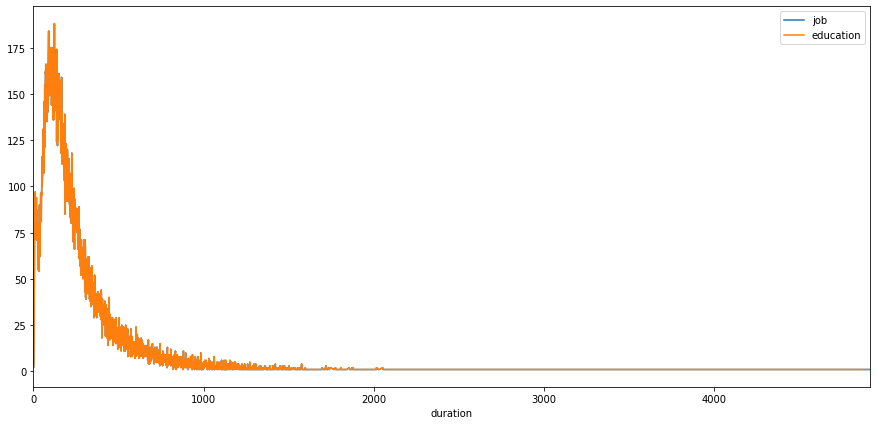

In [66]:
fig, ax = plt.subplots(figsize=(15,7))
df_bank_full.groupby(['duration']).count()[['job','education']].plot(ax=ax)

In [67]:
feature_col=['job', 'marital', 'education','default','balance','housing', 'loan',
             'contact', 'month','month','previous','poutcome']

In [71]:
from sklearn import preprocessing
from sklearn import cluster